# TensorFlow - Keras Regression

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(34) # global seed

print(tf.__version__)

2.10.1


## Lineer Regresyon

We will start with simple linear regression. A simple lineer regression can be like this $y = ax + b$

Lets do our data like this: $y = 2x + 1$. 

I mean we will try to catch 2x+1 formula. Model will try ^^

In [2]:
x = tf.Variable(tf.range(0,10))
x

<tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [3]:
y = tf.Variable(2 * tf.range(0,10) + 1)
y

<tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])>

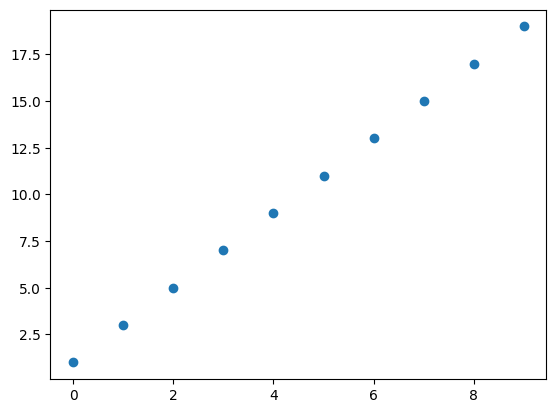

In [4]:
# Lets see our data
plt.scatter(x.numpy() , y.numpy());

## What's Dense Layer ? It calculate what ?

Dense layer is a typical neuron layer in neural network. Every neuron got input from before neurons. In this way they connect densely. Lets show it matematically :

y = Activation(Wx + b)

We will talk about activation functions later, but basically its provide learn to non linear realations.

In [5]:
# A dense layer is enough for lineer regression.
# A dense layer enough because we don't use activation.

# Initial weights start randomly.
# For stabilize the randomness, we use seed set.

# A neuron is enogh because there will be only 1 output.

initializer = tf.keras.initializers.GlorotUniform(seed = 61)

# We can build our model Sequentially. In this way layers come together as stacking.
# There is 2 ways to build model.
# 1) Functional API
# 2) Model Subclassing
# We will talk about them. For now, lets start simpliest one : Sequential.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , input_shape = (1,), # Every x, will be equal to a y
                          kernel_initializer= initializer)]
)

# There is 2 parameter which is we look for. One of them weight matrix, other one is bias.
# Our realation like ax + b 
# a: Weight 
# b: bias - Intercept
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# For Least squares regression, we will use mean squared error loss function.
# We will use stochastic gradient descent for minimize the loss function.
model.compile(loss = 'mse' , optimizer= 'sgd')

# Lets train our model with model.fit() , we give x values and their y values to our model and train them with 1000 epochs
model.fit(x.numpy() , y.numpy() , epochs = 1000 , verbose = 0)
print('Training done')

Training done


In [7]:
# We can see our weight and bias parameters with get_weights() method.

print('Our models a weight value is : ' , model.get_weights()[0].flatten()) # Weight matrix
print('Our models a bias value is : ' , model.get_weights()[1].flatten()) # bias - Intercept

# print(model.get_weights()[0]) # Its 2D now. Lets squeze it.
a = np.squeeze(model.get_weights()[0] , axis = -1)
b = np.squeeze(model.get_weights()[1] , axis = -1)

# It learn almost same with real values. Our function we search was 2x + 1.

Our models a weight value is :  [2.0004725]
Our models a bias value is :  [0.99703705]


In [8]:
# 2x + 1 = 2(21) + 1 = 43
predict = model.predict(tf.convert_to_tensor([21]))
print(f'Our model predict : {predict}')

print(f'Lets calculate manually predict with using model weight and bias : {a*21 + b}')

1/1 [==============================] - 0s 43ms/step
Our model predict : [[43.006958]]
Lets calculate manually predict with using model weight and bias : [43.006958]


## Same model, different data

Lets fit our model with bigger data. There will be 2x + 1 is best model again.

x : [  0 100 200]
y : [  1 201 401]


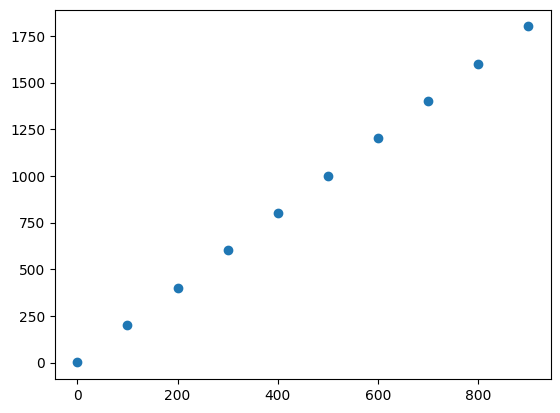

In [9]:
x = tf.Variable(100 * (tf.range(0, 10)))
y = tf.Variable(100 * (2 * tf.range(0, 10)) + 1)

print(f'x : {x[:3]}')
print(f'y : {y[:3]}')

plt.scatter(x.numpy() , y.numpy())
plt.show()

In [10]:
# Lets build our model with same way.

initializer = tf.keras.initializers.GlorotUniform(seed = 61)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , input_shape=(1,), kernel_initializer= initializer)]
)

model.compile(optimizer = 'sgd' , loss = 'mse')

model.fit(x.numpy(), y.numpy() , epochs = 1000 , verbose = 0)
print('Training done.')

Training done.


In [11]:
predict = model.predict(tf.convert_to_tensor([21]))
print(f'Model predict is : {predict}')

1/1 [==============================] - 0s 19ms/step
Model predict is : [[nan]]


In [12]:
print(f'a value learned from model : {model.get_weights()[0].flatten()}')
print(f'b value learned from model : {model.get_weights()[1].flatten()}')

a value learned from model : [nan]
b value learned from model : [nan]


Looks like Model's weight and bias values are completely eploded.

The only change was bigger data. If we give our data with small values, model learned clearly.

[0,1,2,3,4,5,6,7,8,9] -- [1,3,5,7,9,11,13,15,17,19] --> OK

[0,100,200,300,400,500,600,700,800,900] -- [1,201,401,601,801,1001,1201,1401,1601,1801] --> There is a problem.

Lets talk about whats the problem ? It called gradient explosion.

When training a model with gradient-based learning and backpropagation, we find partial derivatives by moving from the last layer of the model to the first layer. Using the chain rule, they go through continuous matrix multiplications to calculate the derivatives of the layers(layers) contained in the model.

If there is n hidden layers in our model, there will be multiply with n derivatives. If derivatives are big, finally, gradients increase exponentially. This called as a gradient explosion problem.

## What can do for Gradient Explosion problem ?
* **(Gradient Clipping)**
  * `clipvalue`
  * `clipnorm`
* **Adaptive Optimizer Using**

### Gradient Clipping

#### Clip Value

If the gradient value is less than a negative threshold or more than a positive threshold, we can say that the derivatives of the loss function are cropped to have a certain value.

For example, we can set a value of 0.2. Thus, the value of the gradient is set to -0.2 if it is less than -0.2, or vice versa, it is set to 0.2 if it is greater than 0.2.

#### **Clip Norm**

The idea behind clipping according to the norm is similar to clipping according to the value(clip value). The difference is to crop the unit vector of Decadents by multiplying it with a threshold.

In [13]:
# Lets create our model in same way

initializer = tf.keras.initializers.GlorotUniform(seed = 61)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , input_shape = (1,),
                          kernel_initializer= initializer)])

# For do clip value, we need to create an object from SGD optimizer.
optimizer = tf.keras.optimizers.SGD(clipvalue = 0.4 , clipnorm = 0.2)
model.compile(optimizer= optimizer , loss = 'mse')

model.fit(x.numpy() , y.numpy() , epochs= 1000 , verbose = 0)
print('Training done')

Training done


In [14]:
pred = model.predict(tf.convert_to_tensor([21]))
print(f"Model precit is : {pred}")

1/1 [==============================] - 0s 19ms/step
Model precit is : [[42.81862]]


In [15]:
print(f'a value learned from model : {model.get_weights()[0].flatten()}')
print(f'b value learned from model : {model.get_weights()[1].flatten()}')

a value learned from model : [2.0016487]
b value learned from model : [0.783997]


Gradientclipping work. You can choose the best clipvalue parameter. Its best practice.

## Adaptive Optimizer

 Before the like Gradient Descent, SGD, mini-batch Gradient Descent optimization techniques, we should set our `learning_rate` hyper parameter. When we use SGD above, there is default LR equal to 0.1. If choosen `learning_rate` don't give good results, we shoult change it and train our model again. Deep learning trainings take time. When some researchers bored to find best `learning_rate` , they use optimization techniques. This optimization techniques are update `learning_rate` for us while Normal SGD `learning_rate` always same.

### Adam - Adaptive Moment Estimation

One of the most important optimizer. There is adam [article](https://arxiv.org/pdf/1412.6980.pdf).

Stochastic optimization is the process of optimizing a function by taking randomness into account. Let's take the *Stochastic Gradient Descent* for this. SGD does a nice job in terms of optimization when we have a lot of data and parameters. Unlike the field Gradient Descent, which processes the entire data set at each step, at each step the SGD calculates an estimate of the gradient from a random subset (mini-batch) of this data.

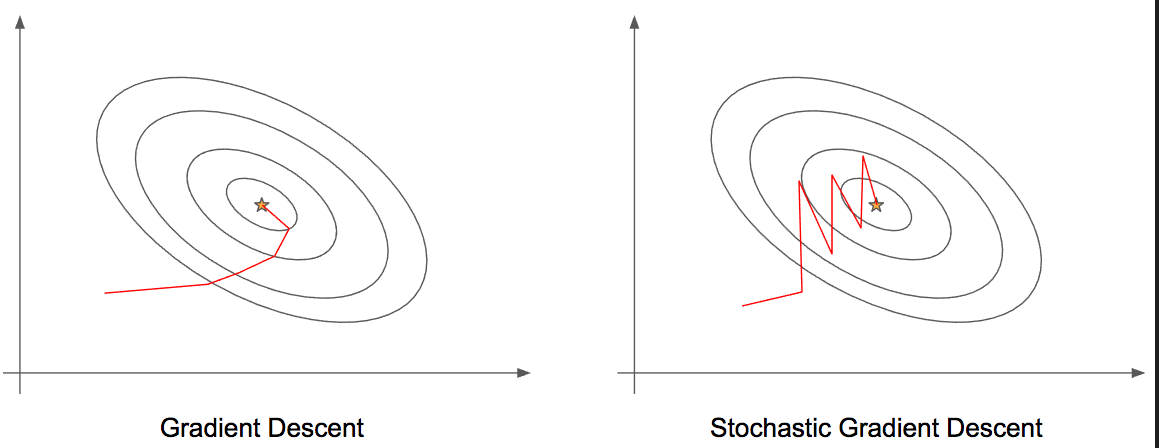

SGD, works updating with batches so its less stabilize.

Before we deep dive into Adam optimizer, we should talk about

* AdaGrad
* RMSProp

These 2 algorithm uses optimization technique, Adam is combine these techniques together. First lets look these 2 algorithm

## AdaGrad(Adaptive Gradient Algorithm):

It is an algorithm that is very similar to RMSProp and again adopts the adaptive `learning_rate` approach. Adagrad adds October element-by-element scaling of gradients based on the sum of squares of gradients of each dimension. This means that we keep a continuous sum of the squares of the gradients. we adapt `learning_rate` by dividing this collection. When we divide `learning_rate` to these total, we can adapt. Lets look their mathematics :

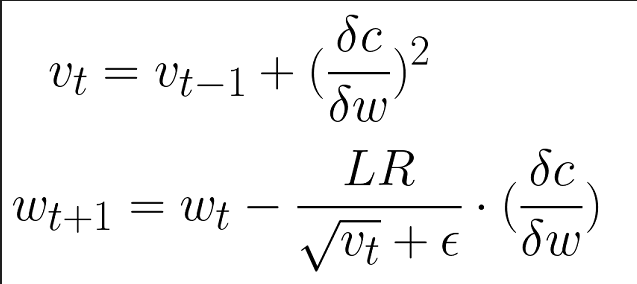

## **RMSProp(Root Mean Square Propagation)**: 

In the RMSProp algorithm, the learning rate is adapted according to the moving average of the magnitudes of the final gradients. In this way, more weight is given to the final gradients. If we put this into a mathematical formula, we will:

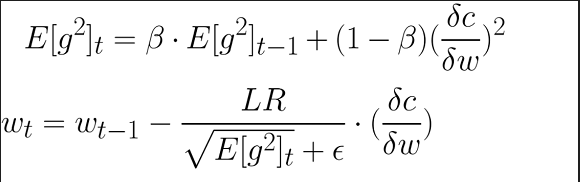

* **E[g]** = The moving average of the squared gradients
* **deltaC / deltaW** = Cost's gradient relative to weights
* **LR** = Learning rate
* $B$ = Moving average parameter(default 0.9).
* **epsilon**: To make sure we don't divide by zero. It is a very small number.

As you can see from the formula above, we adapt the `learning rate` by dividing it by the root of the squared gradient(*adapt*). Since we do training in batches and we only have gradient estimation in the current batches, we need to use a moving average.

The following GIF will suffice to see the difference between these two algorithms from SGD. (Source: https://i.imgur.com/NKsFHJb.gif)

![image-2.gif](https://i.imgur.com/NKsFHJb.gif)

AdaGrad and RMSProp are finding their way much faster. SGD, on the other hand, remains slow.

As you can see, if saddle point is encountered, RMSProp goes down directly. So it doesn't matter how small the gradients are, because RMSProp adapts `learning_rate` to the situation. This way, it gets out of saddle point situations faster.

The GIF below shows the state of the algorithms when we start with very large gradients. (Source: https://imgur.com/a/Hqolp#NKsFHJb )

![image-99.gif](https://i.imgur.com/pD0hWu5.gif)

While RMSProp finds the most optimal path, AdaGrad loses its stability for a moment. Momentum, on the other hand, misses the minimum most of the time.

## Adam

Adam, who is very popular and is used as an optimizer in many models, is a combination. In short, Adam updates any parameter on the network with his own unique `learning_rate`. This means that each parameter in the network has a specific `learning_rate`. In addition, Adam will also adapt his `learning_rate` over time.

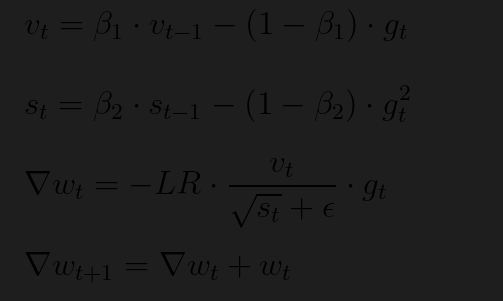

* **g**: Gradient
* **v_{t} ve s_{t}**: It is the exponential average of gradients. (s_t square)


I want to give you the formula before getting into the concept of moment. A random value of N. momenti, his N.the expected value of the force(*expected value*)
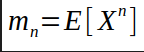

The Adam optimizer uses the adaptive learning rate technique to calculate the current gradient from the first and second moments of the past gradients.

Instead of adapting the learning rate according to the first moment, as in RMSProp, it also uses the average of the second moments of the gradients. In addition, Adam also calculates the square of the gradients and the exponential moving average. Therefore **It can be considered as a combination of AdaGrad and RMSProp**.

The values of $B$ found in the formula are the exponential rate of decrease (*decay rate*) according to the first and second moments, respectively. The algorithm authors suggested the default values of these as 0.9 and 0.999.

If you want to see how it is implemented [to the source code here](https://github.com/tensorflow/tensorflow/blob/754048a0453a04a761e112ae5d99c149eb9910dd/tensorflow/python/training/adam.py#L141 ) can be reached.

In [16]:
# Build model same way
initializer = tf.keras.initializers.GlorotUniform(seed = 61)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,),
                          kernel_initializer= initializer)])

# Lets use Adam Optimizer
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer= optimizer , loss = 'mse')

model.fit(x.numpy() , y.numpy() , epochs = 1000 , verbose = 0)
print('Training Done')

# We expected around 43
pred = model.predict(tf.convert_to_tensor([21]))
print(f'Model predict is : {pred}')

Training Done
1/1 [==============================] - 0s 22ms/step
Model predict is : [[40.17688]]


In [17]:
# Lets look learned weights and bias
print(f'Weight : {model.get_weights()[0].flatten()}' )
print(f'Bias : {model.get_weights()[1].flatten()}')

Weight : [1.8815652]
Bias : [0.6640099]


As we see, Adam solved gradient explotion problem in default.

## Add Some Layers to Model

In [18]:
# Is 2 dense layer will be better ?
tf.keras.backend.clear_session()
initializer = tf.keras.initializers.GlorotUniform(seed = 61)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape= (1,),
                          kernel_initializer=initializer),
    tf.keras.layers.Dense(1)
])

# Lets use Adam
optimizer = tf.keras.optimizers.Adam()
model2.compile(optimizer= optimizer , loss = 'mse')

model2.fit(x.numpy() , y.numpy() , epochs = 1000 , verbose = 0)
print('Training done.')

# We expect around 43 value.
pred = model2(tf.convert_to_tensor([[21]])) # We can also do feed-forward instead of predict.
print(f'Our model predict is : {pred}')

Training done.
Our model predict is : [[43.0571]]


2 Dense layers make model better.

In [ ]:
# Done.